In [1]:
import os
import numpy as np
import ot
from src.morse import Morse

def calc_sinkhorn_dist(a,b,n):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.emd(np.ones(n) / n, np.ones(n) / n, C, reg)
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def nearest_neighbour (mesh,centroids):

    dist, index = mesh.kdtree.query(centroids)

    # Return the nearest neighbor vertex and its distance from the query point
    centroids_nearest_neighbor = mesh.vertices[index]

    return centroids_nearest_neighbor    

# calculate the sinkhorn distance
def calc_ot(a,b):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.sinkhorn_unbalanced(np.ones(n) / n, np.ones(n) / n, M = C, reg = reg, method='sinkhorn')
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    # print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    # print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

def calc_normal_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    # weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    # print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    # print('Weak Sinkhorn distance:', weak_sinkhorn)

    # return sinkhorn2, weak_sinkhorn

# calculate the sinkhorn distance
def calc_unbalanced_SD(a,b):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    reg_m = 1e-3
    G0 = ot.sinkhorn_unbalanced(a, b, M = C, reg = reg, reg_m = reg_m, method='sinkhorn')
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def calc_wasserstein_metric(a,b,n):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.emd(np.ones(n) / n, np.ones(n) / n, C, reg)
    Wasserstein_metric = np.sum(G0 * C)
    return Wasserstein_metric

def command_line_GigaMesh(path,name, method, parameters = ' '):
    giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"

    print("{0}{1}{2}{3}{4}{5}{6}".format(str(giga_path),str(method),' ', str(parameters), ' ' , str(name) ,'.ply'))

    os.chdir(path)
    
    os.system("{0}{1}{2}{3}{4}{5}{6}".format(str(giga_path),str(method),' ', str(parameters), ' ' , str(name) ,'.ply'))

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# from helpers import move_in_

path = '/media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/'
path = '/home/linsel/Documents/PhD/Data/Fumane/annotated/coloured/selected/'
path = '/home/linsel/Documents/PhD/Data/NeanderthalMuseum/3D_Data/raw/'

path = '/home/linsel/Documents/PhD/Data/NeanderthalMuseum/3D_Data/temp/'
# path = 'smb://celsus.local/ehumanities/eHumanities/3D_Data/Messprojekte_Linsel/PHD_Linsel/NeanderthalMuseum/3D_Data/raw/'

exp_path = '../exp_path/'
path_exp = path + exp_path

num = 1000

persistence = 0.04

os.chdir(path)
# name_1 = '202'#_cm_transfromed'

# name_2 = '773'#_cm_transfromed'

In [6]:
# GigaMesh preprocessing and artifact orientation

from Orientation.ArtefactOrientation import artefactOrientation
import trimesh

dict_morse_centroid = {}

morse_check = False

for n,art in enumerate(os.listdir(path)):
    # if n == 101:
    #     print ('end')
    #     break
    if "Bi088_GMCF.ply" == art:
        morse_check = True 
        
    if art.endswith(".ply") and morse_check == True: 
        if not art.endswith("_init.ply") and not art.endswith("_r1.00_n4_v256.volume.ply") and not art.endswith("_GMCF.ply"):
            print (art)            


            art = art [:-4]
            print (art)
            # 1. Cleaning and filling 
            method = "./gigamesh-clean"

            art_1 = command_line_GigaMesh(path,art,method)

            append = '_GMCF' 
            art_1 = art + append

            try: 
                # 2. Orienatate the artifact
                append = '_init' 

                AO_1 = artefactOrientation()
                AO_1.load_ply(path, art_1,exp_path)
                AO_1.get_or_calc_curvature()
                AO_1.create_trafomat()
                AO_1.kmeans_oversegmentation()

                art_1_2 = art_1 + append

                # 3. Calculate integral invariants and max curvature

                method = "./gigamesh-featurevectors"

                command_line_GigaMesh(exp_path, art_1_2,method,'-r 1')

                append = '_r1.00_n4_v256.volume' 
                art_1_3 = art_1_2 + append

                # # 4. Create a oversegmentation with morse cells and calculate their centroids
                # filename_1, quality_index, inverted = "{0}{1}{2}".format(path_exp,art_1_3,'.ply'), 3,True
                # print(filename_1)
                # # filename_2, quality_index, inverted = "{0}{1}{2}".format(exp_path,name_2,'.ply'), 3,True

                # M_1 = Morse()
                # M_1.load_mesh_ply(filename_1,quality_index)

                # M_1.process_lower_stars()
                # # M_1.extract_morse_complex()
                # M_1.reduce_morse_complex(persistence)
                # M_1.extract_morse_cells(persistence)

                # morse_centroids = np.array([np.mean([[M_1.Vertices[v].x,M_1.Vertices[v].y,M_1.Vertices[v].z] for v in M_1.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_1.reducedMorseComplexes[persistence].MorseCells.Cells])            
                # morse_centroids.tofile('{0}{1}{2}.csv'.format(path_exp,art,'_morse_centroids'),sep=',',format='%10.5f')


                # # 5. Calculate find the nearest neighbours of each centroid point to the mesh 
                # mesh = trimesh.load(filename_1)
                # MNN = nearest_neighbour(mesh, morse_centroids)
                # MNN.tofile('{0}{1}{2}.csv'.format(path_exp,art,'_MNN'),sep=',',format='%10.5f')

                # # 6. store temporary in dictionary
                # dict_morse_centroid [art] = {'morse_centroids':morse_centroids , 'MNN' : MNN}     

                

            except:
                dict_morse_centroid [art] = {'status':'not calculated'}    

G083
8.084824323654175


: 

: 

In [ ]:
from Orientation.ArtefactOrientation import artefactOrientation
import trimesh

dict_morse_centroid = {}

for n,art in enumerate(os.listdir(path)):
    # if n == 101:
    #     print ('end')
    #     break

    # if art.endswith(".ply"): 
    if art.endswith("_GMCF.ply"):         
        # art = art [:-4]
        art = art [:-9]        
        # 1. Cleaning and filling 
        method = "./gigamesh-clean"

        # art_1 = command_line_GigaMesh(path,art,method)

        append = '_GMCF' 
        art_1 = art + append

        if '{0}{1}{2}'.format(art,'_MNN','.csv') in os.listdir(exp_path):
            print('Existing: ' + art)
            continue

        try: 
            # 2. Orienatate the artifact
            append = '_O' 

            AO_1 = artefactOrientation()
            AO_1.load_ply(path, art_1,exp_path)
            AO_1.get_or_calc_curvature()
            AO_1.create_trafomat()

            del AO_1

            art_1_2 = art_1 + append

            # 3. Calculate integral invariants and max curvature

            method = "./gigamesh-featurevectors"

            # command_line_GigaMesh(exp_path, art_1_2,method,'-r 1')

            append = '_r1.00_n4_v256.volume' 
            art_1_3 = art_1_2 + append

            # 4. Create a oversegmentation with morse cells and calculate their centroids
            filename_1, quality_index, inverted = "{0}{1}{2}".format(path_exp,art_1_3,'.ply'), 3,True
            print(filename_1)
            # filename_2, quality_index, inverted = "{0}{1}{2}".format(exp_path,name_2,'.ply'), 3,True

            M_1 = Morse()
            M_1.load_mesh_ply(filename_1,quality_index)

            M_1.process_lower_stars()
            # M_1.extract_morse_complex()
            M_1.reduce_morse_complex(persistence)
            M_1.extract_morse_cells(persistence)

            morse_centroids = np.array([np.mean([[M_1.Vertices[v].x,M_1.Vertices[v].y,M_1.Vertices[v].z] for v in M_1.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_1.reducedMorseComplexes[persistence].MorseCells.Cells])            
            morse_centroids.tofile('{0}{1}{2}.csv'.format(path_exp,art,'_morse_centroids'),sep=',',format='%10.5f')

            del M_1
            # 5. Calculate find the nearest neighbours of each centroid point to the mesh 
            mesh = trimesh.load(filename_1)
            MNN = nearest_neighbour(mesh, morse_centroids)
            MNN.tofile('{0}{1}{2}.csv'.format(path_exp,art,'_MNN'),sep=',',format='%10.5f')

            # 6. store temporary in dictionary
            # dict_morse_centroid [art] = {'morse_centroids':morse_centroids , 'MNN' : MNN}     

        except:
            print('nope')
            # dict_morse_centroid [art] = {'status':'not calculated'}   
            # 
        try:
            del AO_1,M_1,morse_centroids,MNN,mesh
        except:
            print('nope:2')        

Existing: Bla-028
Existing: Misc003
Existing: G004
Existing: Tech085
Existing: Tech034
Existing: Pe005
Existing: P024
30.742868423461914
nope
nope:2
Existing: Tech062
Existing: Bla016
Existing: Tech089
Existing: N-D010
46.6449019908905
nope
nope:2
Existing: Oss050
Existing: BP010
36.67513561248779
9.512620210647583
/home/linsel/Documents/PhD/Data/NeanderthalMuseum/3D_Data/raw/../exp_path/Bla051_GMCF_init_r1.00_n4_v256.volume.ply
load_mesh_ply took 272.48687 seconds to execute!
process_lower_stars took 44.48474 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 47.24338 seconds to execute!
reduce_morse_complex took 81.44947 seconds to execute!
extract_morse_cells took 74.88328 seconds to execute!
nope:2
Existing: Bi063
Existing: SP008
Existing: R008
Existing: Bla-059
Existing: Bi073
Existing: Fla004
Existing: K047
Existing: R043
Existing: K105
Existing: Bla014
22.05375027656555
t_0
7.436387300491333
/home/linsel/Documents/PhD/Data/NeanderthalMuseu

In [ ]:
from Orientation.ArtefactOrientation import artefactOrientation
import trimesh
import pandas as pd

dict_morse_centroid = {}

for n,art in enumerate(os.listdir(exp_path)):
    if art.endswith('MNN.csv'):

        name = art.split('_')[0]

        MNN = np.genfromtxt('{0}{1}'.format(exp_path,art), delimiter=',')
        #morse_centroids = np.genfromtxt('{0}{1}{2}'.format(exp_path,name,'_morse_centroids.csv'), delimiter=',')

        dict_morse_centroid[name] = {'MNN':np.reshape(MNN, (-1,3))} #,'morse_centroids':np.reshape(morse_centroids, (-1,3))} 

In [ ]:
import json
import numpy as np
from jax import numpy as jnp
from jax.experimental import stax

# Define a complex dictionary with TrackedArrays
model = stax.serial(
    stax.Dense(128), stax.Relu(),
    stax.Dense(64), stax.Relu(),
    stax.Dense(10)
)

# Define a function to convert TrackedArrays to NumPy arrays
def convert_trackedarray(obj):
    if isinstance(obj, jnp.ndarray):
        return obj.tolist()
    elif isinstance(obj, tuple):
        return tuple(convert_trackedarray(o) for o in obj)
    elif isinstance(obj, list):
        return [convert_trackedarray(o) for o in obj]
    elif isinstance(obj, dict):
        return {k: convert_trackedarray(v) for k, v in obj.items()}
    else:
        return obj

# Convert the dictionary to a compatible format and save as JSON file
model_dict = convert_trackedarray(model)
with open('model.json', 'w') as f:
    json.dump(model_dict, f, indent=4)


In [ ]:
# Define a function to convert TrackedArrays to NumPy arrays
def convert_trackedarray(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, tuple):
        return tuple(convert_trackedarray(o) for o in obj)
    elif isinstance(obj, list):
        return [convert_trackedarray(o) for o in obj]
    elif isinstance(obj, dict):
        return {k: convert_trackedarray(v) for k, v in obj.items()}
    else:
        return obj


for key in dict_morse_centroid.keys():
    try:
        print(key)
        dict_morse_centroid[key]['MNN'] = convert_trackedarray(dict_morse_centroid[key]['MNN'])
    except:
        print(key)
        print('no morse')


### Calculate Sinkhorn distance between artifacts

In [ ]:
with open('data.json', 'r') as fp:
    dict_morse_centroid = json.load(fp)

# # Convert serialized TrackedArrays to numpy arrays
# def decode_arrays(dct):
#     if '__TrackedArray__' in dct:
#         return np.array(dct['data']), dct['dtype'], tuple(dct['shape']), tuple(dct['strides'])
#     else:
#         return dct
    
dict_morse_centroid = json.loads(json.loads(json.dumps(dict_morse_centroid)))

In [ ]:
import datetime

keys = list(dict_morse_centroid.keys())

morse_ot_dict = {}

sinkhorn_distance_array =  np.zeros(shape=(len(keys),len(keys)))
weak_sinkhorn_distance_array =  np.zeros(shape=(len(keys),len(keys)))

time_begin_run = datetime.datetime.now()
for n,key in enumerate(keys[:-1]):
    time_begin = datetime.datetime.now()
    print('{0}------------{1}'.format(n,key))
    morse_ot_dict[key] = {}

    for i in range(1,len(keys) - (n)):
        try:
            weak_sinkhorn, sinkhorn =  calc_normal_weak_sinkhorn2(dict_morse_centroid[key]['MNN'],dict_morse_centroid [keys[n+i]]['MNN'])
            # create cost matrix of weak and ordinary sinklhorn distance 
            weak_sinkhorn_distance_array[n,n+i] = weak_sinkhorn
            weak_sinkhorn_distance_array[n+i,n] = weak_sinkhorn
            sinkhorn_distance_array [n,n+i] = sinkhorn
            sinkhorn_distance_array [n+i,n] = sinkhorn

            # create dictionary for weak and ordinary sinklhorn distance             
            morse_ot_dict[key][keys[n+i]] = {'weak_sinkhorn':weak_sinkhorn, 'sinkhorn':sinkhorn}
        except:
            morse_ot_dict[key][keys[n+i]] = 'not calculated'
    
    print ('Duration of run number {0}: {1}'.format(n + 1,datetime.datetime.now() - time_begin))
    print ('Runs done: {0}, runs left: {1}'.format(n + 1, len(keys) - 1 - n))

print('Total time: {0}'.format(datetime.datetime.now() - time_begin_run))

0------------Bu037
Duration of run number 1: 0:23:38.767366
Runs done: 1, runs left: 54
1------------K109


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:485: RuntimeWarning: overflow encountered in true_divide
  u = 1. / nx.dot(Kp, v)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 15
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


: 

: 

In [ ]:
import json

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


json_dump = json.dumps(morse_ot_dict, 
                       cls=NumpyEncoder)
with open('data.json', 'w') as fp:
    json.dump(json_dump, fp)

In [ ]:
for key in keys: 
    for key_cross in morse_ot_dict.keys():
        if morse_ot_dict[key][key_cross] != 'not calculated':
            keys_calc = [key]
            break
        else:
            continue
        break

keys_calc = keys_calc + [keys[n+1] for n,val in enumerate(morse_ot_dict[keys_calc[0]].values()) if val != 'not calculated']

print(keys_calc)

weak_sinkhorn_distance_array_later =  np.zeros(shape=(len(keys_calc),len(keys_calc)))
sinkhorn_distance_array_later =  np.zeros(shape=(len(keys_calc),len(keys_calc)))

for n,key in enumerate(keys_calc[:-1]):
    for i,key2 in enumerate(keys_calc[n+1:]):
        j = i+1
        weak_sinkhorn = morse_ot_dict[key][key2]['weak_sinkhorn']
        sinkhorn = morse_ot_dict[key][key2]['sinkhorn']
        weak_sinkhorn_distance_array_later[n,n+j] = weak_sinkhorn
        weak_sinkhorn_distance_array_later[n+j,n] = weak_sinkhorn
        sinkhorn_distance_array_later [n,n+j] = sinkhorn
        sinkhorn_distance_array_later [n+j,n] = sinkhorn

NameError: name 'morse_ot_dict' is not defined

In [ ]:
weak_sinkhorn_distance_array_later.tofile('weak_sinkhorn_distance_array_later.csv',sep=',',format='%10.5f')
sinkhorn_distance_array_later.tofile('sinkhorn_distance_array_later.csv',sep=',',format='%10.5f')

/tmp/ipykernel_288848/3371225755.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


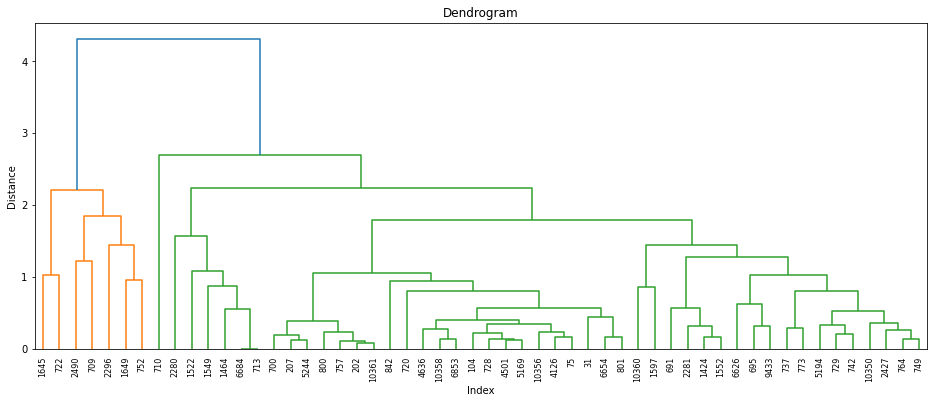

In [ ]:
# weak_sinkhorn_distance_array_later,sinkhorn_distance_array_later

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=keys_calc,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd 
csv_path = '/home/linsel/Documents/PhD/Data/'
csv_name = 'Fumane_Blades_Bladelets_Dataset.csv'

csv_data = pd.read_csv(csv_path + csv_name, sep=",")

In [ ]:
type(csv_data[csv_data["ID"] == int(15)]['Blank'][0])

str

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>

<class 'int'>



/tmp/ipykernel_288848/2804952058.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


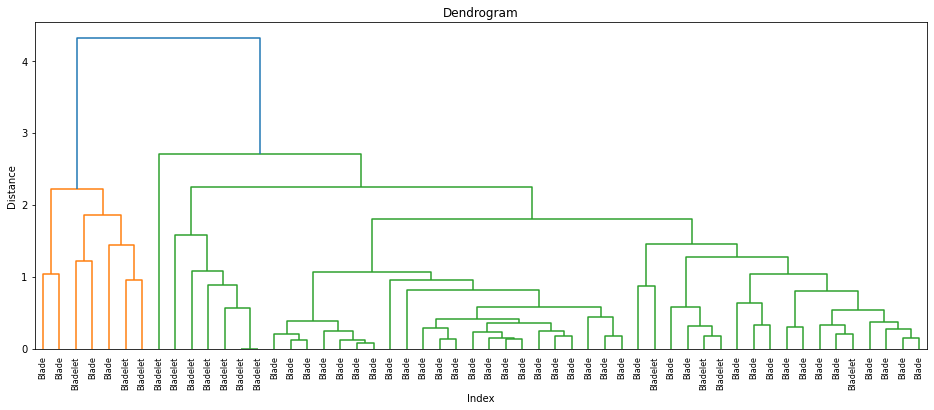

In [ ]:
# create a figure of dendrogram with balnk as label

label_blank = []

for key in keys_calc:
    print(type(int(key)))
    data = csv_data[csv_data["ID"] == int(key)]['Blank']
    label_blank = label_blank + list(data)

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=label_blank,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


/tmp/ipykernel_288848/3107459250.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


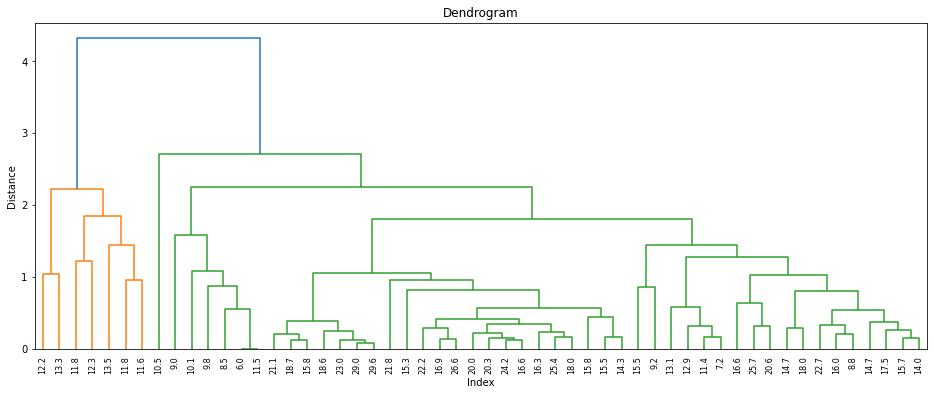

In [ ]:
# create a figure of dendrogram with width as label

label_blank = []

for key in keys_calc:
    print(type(int(key)))
    data = csv_data[csv_data["ID"] == int(key)]['Width']
    label_blank = label_blank + list(data)

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=label_blank,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# 1. Cleaning and filling 

giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"

print ("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path, name_1 ,'.ply'))

os.chdir(path)

os.system("{0}{1}{2}{3}{4}".format(str(giga_path),str(method),' ', str(name_1) ,'.ply'))

append = '_GMCF' 

name_1_1 = name_1 + append

~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean -r 1 /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/202.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file 202.ply...

[GigaMesh] File '"202_GMCF.ply"' already exists - SKIPPED!


In [ ]:
# 2. Orienatate the artifact

from Orientation.ArtefactOrientation import artefactOrientation

append = '_O' 

AO_1 = artefactOrientation()
AO_1.load_ply(path, name_1_1,exp_path)
AO_1.get_or_calc_curvature()
AO_1.create_trafomat()

name_1_2 = name_1_1 +  append

3.536177396774292
2
t_0
1.1097161769866943


In [ ]:
# 3. Calculate integral invariants and max curvature

giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"
method = "./gigamesh-featurevectors"

print ("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path_exp, name_1_2 ,'.ply'))

os.system("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path_exp, name_1_2 ,'.ply'))

append = '_r1.00_n4_v256.volume' 
name_1_3 = name_1_2 + append

~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-featurevectors -r 1 /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply...
[GigaMesh] !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


[GigaMesh] File '"/media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


In [ ]:
# 4. Create a oversegmentation with morse cells and calculate their centroids

filename_1, quality_index, inverted = "{0}{1}{2}".format(path_exp,name_1_3,'.ply'), 3,True

# filename_2, quality_index, inverted = "{0}{1}{2}".format(exp_path,name_2,'.ply'), 3,True

M_1 = Morse()
M_1.load_mesh_ply(filename_1,quality_index)

M_1.process_lower_stars()
# M_1.extract_morse_complex()
M_1.reduce_morse_complex(persistence)
M_1.extract_morse_cells(persistence)

morse_1_centroids = np.array([np.mean([[M_1.Vertices[v].x,M_1.Vertices[v].y,M_1.Vertices[v].z] for v in M_1.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_1.reducedMorseComplexes[persistence].MorseCells.Cells])

load_mesh_ply took 24.56137 seconds to execute!
process_lower_stars took 4.63639 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 7.10657 seconds to execute!
reduce_morse_complex took 24.51346 seconds to execute!
extract_morse_cells took 13.76363 seconds to execute!


In [ ]:
# 5. Calculate find the nearest neighbours of each centroid point to the mesh 

import trimesh
mesh_1 = trimesh.load(filename_1)
MNN_1 = nearest_neighbour(mesh_1, morse_1_centroids)

In [ ]:
import numpy as np
import trimesh

# Load the mesh
mesh = trimesh.load_mesh(path_exp + name_1_2 + '.ply')

# Define a point
point = np.array([mesh.center_mass])

print(point.shape)

# Cast a ray from the point in the positive x direction
ray_direction = np.array([mesh.center_mass])

print(ray_direction)

ray_origin = point

ray = trimesh.ray.ray_triangle.RayMeshIntersector(mesh)
locations, index_ray, index_tri = ray.intersects_location(ray_origins=ray_origin,
                                          ray_directions=ray_direction)

# Count the number of intersections
num_intersections = len(locations)

# Determine if the point is inside or outside the mesh
if num_intersections % 2 == 1:
    print('The point is inside the mesh')
else:
    print('The point is outside the mesh')

(1, 3)
[[23.51048275 26.78755426  7.16959742]]
The point is inside the mesh


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from ot import sinkhorn

# Create two 3D arrays with different sizes
a = np.random.rand(10, 5, 3)
b = np.random.rand(8, 5, 3)

print(a.shape)

# Compute the cost matrix between the two arrays
cost_matrix = cdist(a.reshape(-1, 3), b.reshape(-1, 3))

(10, 5, 3)


In [ ]:
def l2_distance(point_cloud1, point_cloud2):
    """
    Computes the L2 distance function with cost matrix of two 3D point clouds with different sizes
    
    Args:
    - point_cloud1: numpy array of shape (n1, 3) representing the first point cloud
    - point_cloud2: numpy array of shape (n2, 3) representing the second point cloud
    
    Returns:
    - cost_matrix: numpy array of shape (n1, n2) representing the L2 distance cost matrix between the two point clouds
    """
    n1 = point_cloud1.shape[0]
    n2 = point_cloud2.shape[0]
    L2_D = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            L2_D[i, j] = np.linalg.norm(point_cloud1[i] - point_cloud2[j])
    return L2_D

# Test the function with two point clouds of different sizes
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([[10, 11, 12], [13, 14, 15]])
L2_D = l2_distance(X, Y)
print(L2_D)

[[15.58845727 20.78460969]
 [10.39230485 15.58845727]
 [ 5.19615242 10.39230485]]


## Create ellipsoid for orienateted artifact

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plyfile import PlyData,PlyElement
import logging

from   scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from   numpy.linalg import eig, inv

def ls_ellipsoid(xx,yy,zz):                                  
    #finds best fit ellipsoid. Found at http://www.juddzone.com/ALGORITHMS/least_squares_3D_ellipsoid.html
    #least squares fit to a 3D-ellipsoid
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz  = 1
    #
    # Note that sometimes it is expressed as a solution to
    #  Ax^2 + By^2 + Cz^2 + 2Dxy + 2Exz + 2Fyz + 2Gx + 2Hy + 2Iz  = 1
    # where the last six terms have a factor of 2 in them
    # This is in anticipation of forming a matrix with the polynomial coefficients.
    # Those terms with factors of 2 are all off diagonal elements.  These contribute
    # two terms when multiplied out (symmetric) so would need to be divided by two
    
    # change xx from vector of length N to Nx1 matrix so we can use hstack
    x = xx[:,np.newaxis]
    y = yy[:,np.newaxis]
    z = zz[:,np.newaxis]
    
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz = 1
    J = np.hstack((x*x,y*y,z*z,x*y,x*z,y*z, x, y, z))
    K = np.ones_like(x) #column of ones
    
    #np.hstack performs a loop over all samples and creates
    #a row in J for each x,y,z sample:
    # J[ix,0] = x[ix]*x[ix]
    # J[ix,1] = y[ix]*y[ix]
    # etc.
    
    JT=J.transpose()
    JTJ = np.dot(JT,J)
    InvJTJ=np.linalg.inv(JTJ);
    ABC= np.dot(InvJTJ, np.dot(JT,K))

    # Rearrange, move the 1 to the other side
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz - 1 = 0
    #    or
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz + J = 0
    #  where J = -1
    eansa=np.append(ABC,-1)

    return (eansa)

def polyToParams3D(vec,printMe):                             
    #gets 3D parameters of an ellipsoid. Found at http://www.juddzone.com/ALGORITHMS/least_squares_3D_ellipsoid.html
    # convert the polynomial form of the 3D-ellipsoid to parameters
    # center, axes, and transformation matrix
    # vec is the vector whose elements are the polynomial
    # coefficients A..J
    # returns (center, axes, rotation matrix)
    
    #Algebraic form: X.T * Amat * X --> polynomial form
    
    if printMe: print('\npolynomial\n',vec)
    
    Amat=np.array(
    [
    [ vec[0],     vec[3]/2.0, vec[4]/2.0, vec[6]/2.0 ],
    [ vec[3]/2.0, vec[1],     vec[5]/2.0, vec[7]/2.0 ],
    [ vec[4]/2.0, vec[5]/2.0, vec[2],     vec[8]/2.0 ],
    [ vec[6]/2.0, vec[7]/2.0, vec[8]/2.0, vec[9]     ]
    ])
    
    if printMe: print('\nAlgebraic form of polynomial\n',Amat)
    
    #See B.Bartoni, Preprint SMU-HEP-10-14 Multi-dimensional Ellipsoidal Fitting
    # equation 20 for the following method for finding the center
    A3=Amat[0:3,0:3]
    A3inv=inv(A3)
    ofs=vec[6:9]/2.0
    center=-np.dot(A3inv,ofs)
    if printMe: print('\nCenter at:',center)
    
    # Center the ellipsoid at the origin
    Tofs=np.eye(4)
    Tofs[3,0:3]=center
    R = np.dot(Tofs,np.dot(Amat,Tofs.T))
    if printMe: print('\nAlgebraic form translated to center\n',R,'\n')
    
    R3=R[0:3,0:3]
    R3test=R3/R3[0,0]
    # print('normed \n',R3test)
    s1=-R[3, 3]
    R3S=R3/s1
    (el,ec)=eig(R3S)
    
    recip=1.0/np.abs(el)
    axes=np.sqrt(recip)
    if printMe: print('\nAxes are\n',axes  ,'\n')
    
    inve=inv(ec) #inverse is actually the transpose here
    if printMe: print('\nRotation matrix\n',inve)
    return (center,axes,inve)

# generate a 3D point cloud of an best fitting ellipsoid with 10000 points 
# or same number of points as pointcloud, if sqrt of the number of points 
# is even.

def create_best_fit_ellipses(points):

    surface  = np.stack((points[:,0],points[:,1],points[:,2]), axis=-1)
    hullV    = ConvexHull(surface)
    lH       = len(hullV.vertices)
    hull     = np.zeros((lH,3))
    for i in range(len(hullV.vertices)):
        hull[i] = surface[hullV.vertices[i]]
    hull     = np.transpose(hull)         
                
    #fit ellipsoid on convex hull

    #get ellipsoid polynomial coefficients
    eansa            = ls_ellipsoid(hull[1],hull[0],hull[2]) #get ellipsoid polynomial coefficients

    # define the center, axes, and inverse of the axes of the ellipsoid
    center,axes,inve = polyToParams3D(eansa,False)

    invemat = np.vstack((inve,np.array([center]))).T
    invemat = np.vstack((invemat, np.array([0,0,0,1])))

    # test if the number of centroids is devideable by 3 

    if int(np.sqrt(len(points)))  % 2 != 0:
        p_len = 100
    else:
        p_len = int(np.sqrt(len(points))) 

    # generate the surface of the ellipsoid
    theta = np.linspace(0, 2*np.pi, p_len)
    phi = np.linspace(0, np.pi, p_len)
    x = axes[0]*np.outer(np.cos(theta), np.sin(phi))
    y = axes[1]*np.outer(np.sin(theta), np.sin(phi))
    z = axes[2]*np.outer(np.ones(p_len), np.cos(phi))

    xyz = np.array([x.flatten(), y.flatten(), z.flatten()]).T

    print(x.flatten().shape)
    print(xyz.shape)

    xyz = np.array(xyz)

    xyz_mod = trimesh.points.PointCloud(xyz)

    xyz_mod.apply_transform(invemat)

    xyz_verts = np.array(xyz_mod.vertices)    

    return xyz_mod, xyz_verts

def plot_point_cloud_plus_ellipsoids(points,xyz):
    # plot the point cloud and the ellipsoid
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.set_dpi(1200)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='.', alpha=0.2)
    ax.scatter( xyz[:,0], xyz[:,1],xyz[:,2])#, rstride=4, cstride=4, color='b', alpha=0.2)
    plt.show()

def export_exp_cloud_as_mesh(filename_1 ,exp_cloud):

        Tuple_List = (('x', 'f4'), ('y', 'f4'), ('z', 'f4'))#, ('label', 'uint8'))

        variable_list = {'x':0,'y':1,'z':2}

        vertices_data_types = dict((i, j) for i, j in Tuple_List)

        # define 3D point cloud data
        n = exp_cloud.shape[0]

        # connect the proper data structures

        vertices = np.empty(n, dtype=list(Tuple_List))

        for i in variable_list:

            vertices[i] = exp_cloud[:,variable_list[i]].astype(vertices_data_types[i])

        el_verts = PlyElement.describe(vertices, "vertex")

        # # save as ply
        ply_data = PlyData([el_verts])#, el_faces])
        ply_filename_out = filename_1 + "_morse_ellipsoid.ply"
        logging.debug("saving mesh to %s" % (ply_filename_out))
        ply_data.write(ply_filename_out)    

def point_weights_facesize_normalization(mesh):

    # Get the face areas
    face_areas = mesh.area_faces

    # Normalize the areas
    face_weights = face_areas / np.sum(face_areas)

    # Calculate the impact of each point
    point_impact = np.zeros(mesh.vertices.shape[0])
    for face_idx, face in enumerate(mesh.faces):
        point_impact[face] += face_weights[face_idx]

    # Normalize the point impact
    point_impact /= np.sum(point_impact)      

    return point_impact  

In [ ]:
xyz, xyz_verts = create_best_fit_ellipses(MNN_1) 

name_1_4 = name_1_3 + '_centroid'

print(xyz.vertices)

xyz_hull = xyz.convex_hull

# trimesh.exchange.export.export_mesh(xyz_hull, "{0}{1}{2}".format(path_exp,name_1_4,'.ply'), file_type='ply')

# export_exp_cloud_as_mesh (filename_1,np.vstack([xyz,MNN_1]))

NameError: name 'create_best_fit_ellipses' is not defined

In [ ]:
import os, sys 

# adding current and parent directory to paths
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import PythonLibs.writeLabelsTxt as jan

import trimesh

path = '/media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/'
exp_path = 'exp_path/'
path_exp = path + exp_path

num = 1000

persistence = 0.04

name = '202_GMCF_O_r1.00_n4_v256.volume_centroid' # '202'#_cm_transfromed'

xyz_hull = trimesh.load_mesh(path_exp + name + '.ply')

point_weigths = point_weights_facesize_normalization(xyz_hull)

dict_point_weigths = {n:pw for n,pw in enumerate(point_weigths)}

jan.write_funvals_txt_file(dict_point_weigths, path_exp + name, 'point_weights')

Time writing funval txt file: 0.008776620990829542


In [ ]:
# define the regularization parameter
epsilon = 0.001

# define two point clouds
X = np.array(xyz) #xyz,MNN_1_centered]
Y = np.array(MNN_1_centered)

# compute the distance matrix between X and Y
C = ot.dist(X, Y)

# normalize the distance matrix
C = C / np.max(C)

print(C.shape)

# compute the Sinkhorn distance matrix
# softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
sinkhorn = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

print (sinkhorn)
# compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# print the Weak Sinkhorn distance
print('Weak Sinkhorn distance:', weak_sinkhorn)

0.016406690574812834
Weak Sinkhorn distance: 0.004110066065466974


## Sinkhorn Distance Tests

In [ ]:
import numpy as np
import ot
from scipy.special import softmax


def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

calc_normal_weak_sinkhorn2(xyz,MNN_1)

# # compute the Sinkhorn distance matrix
# sinkhorn = ot.sinkhorn2(X[:,0],Y[:,0], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]


# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# # compute the Sinkhorn distance matrix
# sinkhorn = ot.sinkhorn2(X[:,1],Y[:,1], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# sinkhorn = ot.sinkhorn2(X[:,2],Y[:,2], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# MNN_1 and MNN_2
# 0.1128827014666011
# Weak Sinkhorn distance: 0.002181406039525144 
# /home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:485: RuntimeWarning: overflow encountered in true_divide
#   u = 1. / nx.dot(Kp, v)
# /home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 685
#   warnings.warn('Warning: numerical errors at iteration %d' % ii)
# 18808.122898734593
# Weak Sinkhorn distance: -0.009842044124584701
# 16267.475337914744
# Weak Sinkhorn distance: -0.009696923015333857
# 23411.36467402719

Sinkhorn distance: 0.014746024282208609
Weak Sinkhorn distance: 0.004216781772718041


(0.014746024282208609, 0.004216781772718041)

In [ ]:
sinkhorn = ot.sinkhorn2(X[:,2],Y[:,2], C, epsilon)
# softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

print (sinkhorn)
# compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# print the Weak Sinkhorn distance
print('Weak Sinkhorn distance:', weak_sinkhorn)

In [ ]:
# Author: Remi Flamary <remi.flamary@polytechnique.edu>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 3

import numpy as np
import matplotlib.pyplot as pl
import torch
from torch import nn
import ot
import ot.plot


torch.manual_seed(42)
np.random.seed(42)

n_source_samples = 15000
n_target_samples = 10000
theta = 2 * np.pi / 20
noise_level = 0.1

Xs = MNN_1 # np.random.randn(n_source_samples, 3) * 0.5
Xt = MNN_1 # np.random.randn(n_target_samples, 3) * 2

n_source_samples = MNN_1.shape[0]
n_target_samples = MNN_1.shape[0]

# one of the target mode changes its variance (no linear mapping)
# Xt = Xt + 4


Text(0.5, 1.0, 'Source and target distributions')

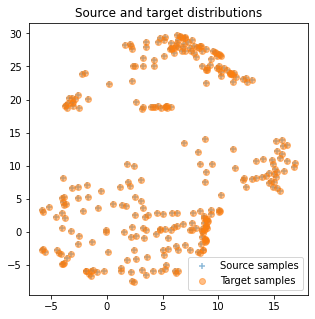

In [ ]:
nvisu = 300
pl.figure(1, (5, 5))
pl.clf()
pl.scatter(Xs[:nvisu, 0], Xs[:nvisu, 1], marker='+', label='Source samples', alpha=0.5)
pl.scatter(Xt[:nvisu, 0], Xt[:nvisu, 1], marker='o', label='Target samples', alpha=0.5)
pl.legend(loc=0)
ax_bounds = pl.axis()
pl.title('Source and target distributions')

In [ ]:
xs = torch.tensor(Xs)
xt = torch.tensor(Xt)

In [ ]:
torch.manual_seed(42)

# define the MLP model
class Potential(torch.nn.Module):
    def __init__(self):
        super(Potential, self).__init__()
        self.fc1 = nn.Linear(3, 200)
        self.fc2 = nn.Linear(200, 1)
        self.relu = torch.nn.ReLU()  # instead of Heaviside step fn

    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)  # instead of Heaviside step fn
        output = self.fc2(output)
        return output.ravel()


u = Potential().double()
v = Potential().double()

reg = 1

optimizer = torch.optim.Adam(list(u.parameters()) + list(v.parameters()), lr=.005)

# number of iteration
n_iter = 1000
n_batch = 500

sinkhorns = []
losses = []

for i in range(n_iter):

    # generate noise samples

    iperms = torch.randint(0, n_source_samples, (n_batch,))
    ipermt = torch.randint(0, n_target_samples, (n_batch,))

    xsi = xs[iperms]
    xti = xt[ipermt]

    # minus because we maximize te dual loss
    loss = -ot.stochastic.loss_dual_entropic(u(xsi), v(xti), xsi, xti, reg=reg)
    sinkhorn = ot.bregman.sinkhorn2()
    sinkhorns.append(sinkhorn)
    losses.append(float(loss.detach()))

    if i % 10 == 0:
        print("Iter: {:3d}, loss={}".format(i, losses[-1]))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


pl.figure(2)
pl.plot(losses)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

TypeError: sinkhorn2() missing 4 required positional arguments: 'a', 'b', 'M', and 'reg'

In [ ]:
pl.figure(2)
pl.plot(sinkhorns)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

In [ ]:
n_samples_a = 8
n_samples_b = 2
reg = 0.1
X_s = np.reshape(np.arange(n_samples_a, dtype=np.float64), (n_samples_a, 1))
X_t = np.reshape(np.arange(0, n_samples_b, dtype=np.float64), (n_samples_b, 1))


b = np.full((n_samples_b, 3), 1/n_samples_b)
ot.bregman.empirical_sinkhorn (X_s, X_t, b=b, reg=reg, verbose=False)
# array([4.53978687e-05, 4.53978687e-05, 4.53978687e-05])

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


array([12.49988076, 12.49988076, 12.49988076])

In [ ]:
from  sklearn.metrics import pairwise_distances

# Define the function to calculate the weak sinkhorn distance
def weak_sinkhorn_distance(X, Y, reg=0.1, epsilon=0.01, max_iter=100):
    """
    X: numpy array of shape (n, d) containing the first point cloud
    Y: numpy array of shape (m, d) containing the second point cloud
    reg: regularization parameter
    epsilon: stopping criterion
    max_iter: maximum number of iterations
    """

    # Calculate the cost matrix
    C = pairwise_distances(X, Y, metric='euclidean')
    C = ot.dist(X, Y)


    # Initialize the kernel matrices
    K = np.exp(-C / reg)
    a = np.ones(X.shape[0]) / X.shape[0]
    b = np.ones(Y.shape[0]) / Y.shape[0]

    # Loop until convergence or maximum number of iterations reached
    for i in range(max_iter):
        # Compute the current dual potentials
        u = -reg * np.log(a + 1e-16)
        v = -reg * np.log(b + 1e-16)

        # Compute the current primal potentials
        Kt_u = K.T.dot(u)
        K_v = K.dot(v)

        # Update the dual variables
        a = 1 / (K_v + epsilon)
        b = 1 / (Kt_u + epsilon)

        # Check for convergence
        if np.sum(np.abs(a * K_v - 1)) < epsilon and np.sum(np.abs(b * Kt_u - 1)) < epsilon:
            break

    # Compute the weak sinkhorn distance
    
    return np.sum(K * C) * reg


# Example usage
# X = np.random.rand(100, 3)
# Y = np.random.rand(200, 3)
distance = weak_sinkhorn_distance(X, Y)
print(distance)

/tmp/ipykernel_132814/4232814886.py:26: RuntimeWarning: invalid value encountered in log
  u = -reg * np.log(a + 1e-16)
/tmp/ipykernel_132814/4232814886.py:27: RuntimeWarning: invalid value encountered in log
  v = -reg * np.log(b + 1e-16)


ValueError: operands could not be broadcast together with shapes (100,) (50,) 

In [ ]:
# # compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(distance).sum()
weak_sinkhorn

0.013161202980027153

load_mesh_ply took 27.65749 seconds to execute!
process_lower_stars took 5.54784 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 8.10335 seconds to execute!
reduce_morse_complex took 17.08843 seconds to execute!
extract_morse_cells took 10.04885 seconds to execute!


In [ ]:
M_2 = Morse()
M_2.load_mesh_ply(filename_2,quality_index)

M_2.process_lower_stars()
# M_2.extract_morse_complex()
M_2.reduce_morse_complex(persistence)
M_2.extract_morse_cells(persistence)

morse_2_centroids = np.array([np.mean([[M_2.Vertices[v].x,M_2.Vertices[v].y,M_2.Vertices[v].z] for v in M_2.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_2.reducedMorseComplexes[persistence].MorseCells.Cells])

load_mesh_ply took 28.72936 seconds to execute!
process_lower_stars took 5.25293 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 9.03082 seconds to execute!
reduce_morse_complex took 24.41745 seconds to execute!
extract_morse_cells took 7.45667 seconds to execute!


In [ ]:
import trimesh
mesh_2 = trimesh.load(filename_2)

MNN_2 = nearest_neighbour(mesh_2, morse_2_centroids)

In [ ]:
calc_unbalanced_SD(MNN_1,MNN_2)

ValueError: cannot reshape array of size 20487 into shape (6829,1)

## 

In [ ]:
import os
import numpy as np
import ot
from src.morse import Morse

def calc_sinkhorn_dist(a,b,n):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.emd(np.ones(n) / n, np.ones(n) / n, C, reg)
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def nearest_neighbour (mesh,centroids):

    dist, index = mesh.kdtree.query(centroids)

    # Return the nearest neighbor vertex and its distance from the query point
    centroids_nearest_neighbor = mesh.vertices[index]

    return centroids_nearest_neighbor    

# calculate the sinkhorn distance
def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    # print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    # print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

In [ ]:
# 1. Cleaning and filling 

giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"

print ("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path, name_1 ,'.ply'))

os.chdir(path)

os.system("{0}{1}{2}{3}{4}".format(str(giga_path),str(method),' ', str(name_1) ,'.ply'))

append = '_GMCF' 

name_1_1 = name_1 + append

~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean -r 1 /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/202.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file 202.ply...

[GigaMesh] File '"202_GMCF.ply"' already exists - SKIPPED!


In [ ]:
# 2. Orienatate the artifact

from Orientation.ArtefactOrientation import artefactOrientation

append = '_O' 

AO_1 = artefactOrientation()
AO_1.load_ply(path, name_1_1,exp_path)
AO_1.get_or_calc_curvature()
AO_1.create_trafomat()

name_1_2 = name_1_1 +  append

3.536177396774292
2
t_0
1.1097161769866943


In [ ]:
# 3. Calculate integral invariants and max curvature

giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"
method = "./gigamesh-featurevectors"

print ("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path_exp, name_1_2 ,'.ply'))

os.system("{0}{1}{2}{3}{4}{5}".format(giga_path,method,' -r 1 ', path_exp, name_1_2 ,'.ply'))

append = '_r1.00_n4_v256.volume' 
name_1_3 = name_1_2 + append

~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-featurevectors -r 1 /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply...
[GigaMesh] !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


[GigaMesh] File '"/media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: /media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/exp_path/202_GMCF_init.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


In [ ]:
# 4. Create a oversegmentation with morse cells and calculate their centroids

filename_1, quality_index, inverted = "{0}{1}{2}".format(path_exp,name_1_3,'.ply'), 3,True

# filename_2, quality_index, inverted = "{0}{1}{2}".format(exp_path,name_2,'.ply'), 3,True

M_1 = Morse()
M_1.load_mesh_ply(filename_1,quality_index)

M_1.process_lower_stars()
# M_1.extract_morse_complex()
M_1.reduce_morse_complex(persistence)
M_1.extract_morse_cells(persistence)

morse_1_centroids = np.array([np.mean([[M_1.Vertices[v].x,M_1.Vertices[v].y,M_1.Vertices[v].z] for v in M_1.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_1.reducedMorseComplexes[persistence].MorseCells.Cells])

load_mesh_ply took 24.56137 seconds to execute!
process_lower_stars took 4.63639 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 7.10657 seconds to execute!
reduce_morse_complex took 24.51346 seconds to execute!
extract_morse_cells took 13.76363 seconds to execute!


In [ ]:
# 5. Calculate find the nearest neighbours of each centroid point to the mesh 

import trimesh
mesh_1 = trimesh.load(filename_1)
MNN_1 = nearest_neighbour(mesh_1, morse_1_centroids)

In [ ]:
import numpy as np
import trimesh

# Load the mesh
mesh = trimesh.load_mesh(path_exp + name_1_2 + '.ply')

# Define a point
point = np.array([mesh.center_mass])

print(point.shape)

# Cast a ray from the point in the positive x direction
ray_direction = np.array([mesh.center_mass])

print(ray_direction)

ray_origin = point

ray = trimesh.ray.ray_triangle.RayMeshIntersector(mesh)
locations, index_ray, index_tri = ray.intersects_location(ray_origins=ray_origin,
                                          ray_directions=ray_direction)

# Count the number of intersections
num_intersections = len(locations)

# Determine if the point is inside or outside the mesh
if num_intersections % 2 == 1:
    print('The point is inside the mesh')
else:
    print('The point is outside the mesh')

(1, 3)
[[23.51048275 26.78755426  7.16959742]]
The point is inside the mesh


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from ot import sinkhorn

# Create two 3D arrays with different sizes
a = np.random.rand(10, 5, 3)
b = np.random.rand(8, 5, 3)

print(a.shape)

# Compute the cost matrix between the two arrays
cost_matrix = cdist(a.reshape(-1, 3), b.reshape(-1, 3))

(10, 5, 3)


In [ ]:
def l2_distance(point_cloud1, point_cloud2):
    """
    Computes the L2 distance function with cost matrix of two 3D point clouds with different sizes
    
    Args:
    - point_cloud1: numpy array of shape (n1, 3) representing the first point cloud
    - point_cloud2: numpy array of shape (n2, 3) representing the second point cloud
    
    Returns:
    - cost_matrix: numpy array of shape (n1, n2) representing the L2 distance cost matrix between the two point clouds
    """
    n1 = point_cloud1.shape[0]
    n2 = point_cloud2.shape[0]
    L2_D = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            L2_D[i, j] = np.linalg.norm(point_cloud1[i] - point_cloud2[j])
    return L2_D

# Test the function with two point clouds of different sizes
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([[10, 11, 12], [13, 14, 15]])
L2_D = l2_distance(X, Y)
print(L2_D)

[[15.58845727 20.78460969]
 [10.39230485 15.58845727]
 [ 5.19615242 10.39230485]]


## Create ellipsoid for orienateted artifact

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plyfile import PlyData,PlyElement
import logging

from   scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from   numpy.linalg import eig, inv

def ls_ellipsoid(xx,yy,zz):                                  
    #finds best fit ellipsoid. Found at http://www.juddzone.com/ALGORITHMS/least_squares_3D_ellipsoid.html
    #least squares fit to a 3D-ellipsoid
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz  = 1
    #
    # Note that sometimes it is expressed as a solution to
    #  Ax^2 + By^2 + Cz^2 + 2Dxy + 2Exz + 2Fyz + 2Gx + 2Hy + 2Iz  = 1
    # where the last six terms have a factor of 2 in them
    # This is in anticipation of forming a matrix with the polynomial coefficients.
    # Those terms with factors of 2 are all off diagonal elements.  These contribute
    # two terms when multiplied out (symmetric) so would need to be divided by two
    
    # change xx from vector of length N to Nx1 matrix so we can use hstack
    x = xx[:,np.newaxis]
    y = yy[:,np.newaxis]
    z = zz[:,np.newaxis]
    
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz = 1
    J = np.hstack((x*x,y*y,z*z,x*y,x*z,y*z, x, y, z))
    K = np.ones_like(x) #column of ones
    
    #np.hstack performs a loop over all samples and creates
    #a row in J for each x,y,z sample:
    # J[ix,0] = x[ix]*x[ix]
    # J[ix,1] = y[ix]*y[ix]
    # etc.
    
    JT=J.transpose()
    JTJ = np.dot(JT,J)
    InvJTJ=np.linalg.inv(JTJ);
    ABC= np.dot(InvJTJ, np.dot(JT,K))

    # Rearrange, move the 1 to the other side
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz - 1 = 0
    #    or
    #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz + J = 0
    #  where J = -1
    eansa=np.append(ABC,-1)

    return (eansa)

def polyToParams3D(vec,printMe):                             
    #gets 3D parameters of an ellipsoid. Found at http://www.juddzone.com/ALGORITHMS/least_squares_3D_ellipsoid.html
    # convert the polynomial form of the 3D-ellipsoid to parameters
    # center, axes, and transformation matrix
    # vec is the vector whose elements are the polynomial
    # coefficients A..J
    # returns (center, axes, rotation matrix)
    
    #Algebraic form: X.T * Amat * X --> polynomial form
    
    if printMe: print('\npolynomial\n',vec)
    
    Amat=np.array(
    [
    [ vec[0],     vec[3]/2.0, vec[4]/2.0, vec[6]/2.0 ],
    [ vec[3]/2.0, vec[1],     vec[5]/2.0, vec[7]/2.0 ],
    [ vec[4]/2.0, vec[5]/2.0, vec[2],     vec[8]/2.0 ],
    [ vec[6]/2.0, vec[7]/2.0, vec[8]/2.0, vec[9]     ]
    ])
    
    if printMe: print('\nAlgebraic form of polynomial\n',Amat)
    
    #See B.Bartoni, Preprint SMU-HEP-10-14 Multi-dimensional Ellipsoidal Fitting
    # equation 20 for the following method for finding the center
    A3=Amat[0:3,0:3]
    A3inv=inv(A3)
    ofs=vec[6:9]/2.0
    center=-np.dot(A3inv,ofs)
    if printMe: print('\nCenter at:',center)
    
    # Center the ellipsoid at the origin
    Tofs=np.eye(4)
    Tofs[3,0:3]=center
    R = np.dot(Tofs,np.dot(Amat,Tofs.T))
    if printMe: print('\nAlgebraic form translated to center\n',R,'\n')
    
    R3=R[0:3,0:3]
    R3test=R3/R3[0,0]
    # print('normed \n',R3test)
    s1=-R[3, 3]
    R3S=R3/s1
    (el,ec)=eig(R3S)
    
    recip=1.0/np.abs(el)
    axes=np.sqrt(recip)
    if printMe: print('\nAxes are\n',axes  ,'\n')
    
    inve=inv(ec) #inverse is actually the transpose here
    if printMe: print('\nRotation matrix\n',inve)
    return (center,axes,inve)

# generate a 3D point cloud of an best fitting ellipsoid with 10000 points 
# or same number of points as pointcloud, if sqrt of the number of points 
# is even.

def create_best_fit_ellipses(points):

    surface  = np.stack((points[:,0],points[:,1],points[:,2]), axis=-1)
    hullV    = ConvexHull(surface)
    lH       = len(hullV.vertices)
    hull     = np.zeros((lH,3))
    for i in range(len(hullV.vertices)):
        hull[i] = surface[hullV.vertices[i]]
    hull     = np.transpose(hull)         
                
    #fit ellipsoid on convex hull

    #get ellipsoid polynomial coefficients
    eansa            = ls_ellipsoid(hull[1],hull[0],hull[2]) #get ellipsoid polynomial coefficients

    # define the center, axes, and inverse of the axes of the ellipsoid
    center,axes,inve = polyToParams3D(eansa,False)

    invemat = np.vstack((inve,np.array([center]))).T
    invemat = np.vstack((invemat, np.array([0,0,0,1])))

    # test if the number of centroids is devideable by 3 

    if int(np.sqrt(len(points)))  % 2 != 0:
        p_len = 100
    else:
        p_len = int(np.sqrt(len(points))) 

    # generate the surface of the ellipsoid
    theta = np.linspace(0, 2*np.pi, p_len)
    phi = np.linspace(0, np.pi, p_len)
    x = axes[0]*np.outer(np.cos(theta), np.sin(phi))
    y = axes[1]*np.outer(np.sin(theta), np.sin(phi))
    z = axes[2]*np.outer(np.ones(p_len), np.cos(phi))

    xyz = np.array([x.flatten(), y.flatten(), z.flatten()]).T

    print(x.flatten().shape)
    print(xyz.shape)

    xyz = np.array(xyz)

    xyz_mod = trimesh.points.PointCloud(xyz)

    xyz_mod.apply_transform(invemat)

    xyz_verts = np.array(xyz_mod.vertices)    

    return xyz_mod, xyz_verts

def plot_point_cloud_plus_ellipsoids(points,xyz):
    # plot the point cloud and the ellipsoid
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.set_dpi(1200)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='.', alpha=0.2)
    ax.scatter( xyz[:,0], xyz[:,1],xyz[:,2])#, rstride=4, cstride=4, color='b', alpha=0.2)
    plt.show()

def export_exp_cloud_as_mesh(filename_1 ,exp_cloud):

        Tuple_List = (('x', 'f4'), ('y', 'f4'), ('z', 'f4'))#, ('label', 'uint8'))

        variable_list = {'x':0,'y':1,'z':2}

        vertices_data_types = dict((i, j) for i, j in Tuple_List)

        # define 3D point cloud data
        n = exp_cloud.shape[0]

        # connect the proper data structures

        vertices = np.empty(n, dtype=list(Tuple_List))

        for i in variable_list:

            vertices[i] = exp_cloud[:,variable_list[i]].astype(vertices_data_types[i])

        el_verts = PlyElement.describe(vertices, "vertex")

        # # save as ply
        ply_data = PlyData([el_verts])#, el_faces])
        ply_filename_out = filename_1 + "_morse_ellipsoid.ply"
        logging.debug("saving mesh to %s" % (ply_filename_out))
        ply_data.write(ply_filename_out)    

def point_weights_facesize_normalization(mesh):

    # Get the face areas
    face_areas = mesh.area_faces

    # Normalize the areas
    face_weights = face_areas / np.sum(face_areas)

    # Calculate the impact of each point
    point_impact = np.zeros(mesh.vertices.shape[0])
    for face_idx, face in enumerate(mesh.faces):
        point_impact[face] += face_weights[face_idx]

    # Normalize the point impact
    point_impact /= np.sum(point_impact)      

    return point_impact  

In [ ]:
xyz, xyz_verts = create_best_fit_ellipses(MNN_1) 

name_1_4 = name_1_3 + '_centroid'

print(xyz.vertices)

xyz_hull = xyz.convex_hull

# trimesh.exchange.export.export_mesh(xyz_hull, "{0}{1}{2}".format(path_exp,name_1_4,'.ply'), file_type='ply')

# export_exp_cloud_as_mesh (filename_1,np.vstack([xyz,MNN_1]))

NameError: name 'create_best_fit_ellipses' is not defined

In [ ]:
import os, sys 

# adding current and parent directory to paths
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import PythonLibs.writeLabelsTxt as jan

import trimesh

path = '/media/linsel/3931-6632/data/phd_stone_tools/Blades_Bladelets_PLY/annotated/coloured/selected/'
exp_path = 'exp_path/'
path_exp = path + exp_path

num = 1000

persistence = 0.04

name = '202_GMCF_O_r1.00_n4_v256.volume_centroid' # '202'#_cm_transfromed'

xyz_hull = trimesh.load_mesh(path_exp + name + '.ply')

point_weigths = point_weights_facesize_normalization(xyz_hull)

dict_point_weigths = {n:pw for n,pw in enumerate(point_weigths)}

jan.write_funvals_txt_file(dict_point_weigths, path_exp + name, 'point_weights')

Time writing funval txt file: 0.008776620990829542


In [ ]:
# define the regularization parameter
epsilon = 0.001

# define two point clouds
X = np.array(xyz) #xyz,MNN_1_centered]
Y = np.array(MNN_1_centered)

# compute the distance matrix between X and Y
C = ot.dist(X, Y)

# normalize the distance matrix
C = C / np.max(C)

print(C.shape)

# compute the Sinkhorn distance matrix
# softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
sinkhorn = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

print (sinkhorn)
# compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# print the Weak Sinkhorn distance
print('Weak Sinkhorn distance:', weak_sinkhorn)

0.016406690574812834
Weak Sinkhorn distance: 0.004110066065466974


## Sinkhorn Distance Tests

In [ ]:
import numpy as np
import ot
from scipy.special import softmax


def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

calc_normal_weak_sinkhorn2(xyz,MNN_1)

# # compute the Sinkhorn distance matrix
# sinkhorn = ot.sinkhorn2(X[:,0],Y[:,0], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]


# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# # compute the Sinkhorn distance matrix
# sinkhorn = ot.sinkhorn2(X[:,1],Y[:,1], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# sinkhorn = ot.sinkhorn2(X[:,2],Y[:,2], C, epsilon)
# # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

# print (sinkhorn)
# # compute the Weak Sinkhorn distance
# weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# # print the Weak Sinkhorn distance
# print('Weak Sinkhorn distance:', weak_sinkhorn)

# MNN_1 and MNN_2
# 0.1128827014666011
# Weak Sinkhorn distance: 0.002181406039525144 
# /home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:485: RuntimeWarning: overflow encountered in true_divide
#   u = 1. / nx.dot(Kp, v)
# /home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 685
#   warnings.warn('Warning: numerical errors at iteration %d' % ii)
# 18808.122898734593
# Weak Sinkhorn distance: -0.009842044124584701
# 16267.475337914744
# Weak Sinkhorn distance: -0.009696923015333857
# 23411.36467402719

Sinkhorn distance: 0.014746024282208609
Weak Sinkhorn distance: 0.004216781772718041


(0.014746024282208609, 0.004216781772718041)

In [ ]:
sinkhorn = ot.sinkhorn2(X[:,2],Y[:,2], C, epsilon)
# softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]

print (sinkhorn)
# compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(sinkhorn).sum()

# print the Weak Sinkhorn distance
print('Weak Sinkhorn distance:', weak_sinkhorn)

In [ ]:
# Author: Remi Flamary <remi.flamary@polytechnique.edu>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 3

import numpy as np
import matplotlib.pyplot as pl
import torch
from torch import nn
import ot
import ot.plot


torch.manual_seed(42)
np.random.seed(42)

n_source_samples = 15000
n_target_samples = 10000
theta = 2 * np.pi / 20
noise_level = 0.1

Xs = MNN_1 # np.random.randn(n_source_samples, 3) * 0.5
Xt = MNN_1 # np.random.randn(n_target_samples, 3) * 2

n_source_samples = MNN_1.shape[0]
n_target_samples = MNN_1.shape[0]

# one of the target mode changes its variance (no linear mapping)
# Xt = Xt + 4


Text(0.5, 1.0, 'Source and target distributions')

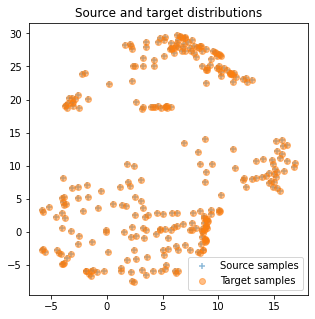

In [ ]:
nvisu = 300
pl.figure(1, (5, 5))
pl.clf()
pl.scatter(Xs[:nvisu, 0], Xs[:nvisu, 1], marker='+', label='Source samples', alpha=0.5)
pl.scatter(Xt[:nvisu, 0], Xt[:nvisu, 1], marker='o', label='Target samples', alpha=0.5)
pl.legend(loc=0)
ax_bounds = pl.axis()
pl.title('Source and target distributions')

In [ ]:
xs = torch.tensor(Xs)
xt = torch.tensor(Xt)

In [ ]:
torch.manual_seed(42)

# define the MLP model
class Potential(torch.nn.Module):
    def __init__(self):
        super(Potential, self).__init__()
        self.fc1 = nn.Linear(3, 200)
        self.fc2 = nn.Linear(200, 1)
        self.relu = torch.nn.ReLU()  # instead of Heaviside step fn

    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)  # instead of Heaviside step fn
        output = self.fc2(output)
        return output.ravel()


u = Potential().double()
v = Potential().double()

reg = 1

optimizer = torch.optim.Adam(list(u.parameters()) + list(v.parameters()), lr=.005)

# number of iteration
n_iter = 1000
n_batch = 500

sinkhorns = []
losses = []

for i in range(n_iter):

    # generate noise samples

    iperms = torch.randint(0, n_source_samples, (n_batch,))
    ipermt = torch.randint(0, n_target_samples, (n_batch,))

    xsi = xs[iperms]
    xti = xt[ipermt]

    # minus because we maximize te dual loss
    loss = -ot.stochastic.loss_dual_entropic(u(xsi), v(xti), xsi, xti, reg=reg)
    sinkhorn = ot.bregman.sinkhorn2()
    sinkhorns.append(sinkhorn)
    losses.append(float(loss.detach()))

    if i % 10 == 0:
        print("Iter: {:3d}, loss={}".format(i, losses[-1]))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


pl.figure(2)
pl.plot(losses)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

TypeError: sinkhorn2() missing 4 required positional arguments: 'a', 'b', 'M', and 'reg'

In [ ]:
pl.figure(2)
pl.plot(sinkhorns)
pl.grid()
pl.title('Dual objective (negative)')
pl.xlabel("Iterations")

In [ ]:
n_samples_a = 8
n_samples_b = 2
reg = 0.1
X_s = np.reshape(np.arange(n_samples_a, dtype=np.float64), (n_samples_a, 1))
X_t = np.reshape(np.arange(0, n_samples_b, dtype=np.float64), (n_samples_b, 1))


b = np.full((n_samples_b, 3), 1/n_samples_b)
ot.bregman.empirical_sinkhorn (X_s, X_t, b=b, reg=reg, verbose=False)
# array([4.53978687e-05, 4.53978687e-05, 4.53978687e-05])

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


array([12.49988076, 12.49988076, 12.49988076])

In [ ]:
from  sklearn.metrics import pairwise_distances

# Define the function to calculate the weak sinkhorn distance
def weak_sinkhorn_distance(X, Y, reg=0.1, epsilon=0.01, max_iter=100):
    """
    X: numpy array of shape (n, d) containing the first point cloud
    Y: numpy array of shape (m, d) containing the second point cloud
    reg: regularization parameter
    epsilon: stopping criterion
    max_iter: maximum number of iterations
    """

    # Calculate the cost matrix
    C = pairwise_distances(X, Y, metric='euclidean')
    C = ot.dist(X, Y)


    # Initialize the kernel matrices
    K = np.exp(-C / reg)
    a = np.ones(X.shape[0]) / X.shape[0]
    b = np.ones(Y.shape[0]) / Y.shape[0]

    # Loop until convergence or maximum number of iterations reached
    for i in range(max_iter):
        # Compute the current dual potentials
        u = -reg * np.log(a + 1e-16)
        v = -reg * np.log(b + 1e-16)

        # Compute the current primal potentials
        Kt_u = K.T.dot(u)
        K_v = K.dot(v)

        # Update the dual variables
        a = 1 / (K_v + epsilon)
        b = 1 / (Kt_u + epsilon)

        # Check for convergence
        if np.sum(np.abs(a * K_v - 1)) < epsilon and np.sum(np.abs(b * Kt_u - 1)) < epsilon:
            break

    # Compute the weak sinkhorn distance
    
    return np.sum(K * C) * reg


# Example usage
# X = np.random.rand(100, 3)
# Y = np.random.rand(200, 3)
distance = weak_sinkhorn_distance(X, Y)
print(distance)

/tmp/ipykernel_132814/4232814886.py:26: RuntimeWarning: invalid value encountered in log
  u = -reg * np.log(a + 1e-16)
/tmp/ipykernel_132814/4232814886.py:27: RuntimeWarning: invalid value encountered in log
  v = -reg * np.log(b + 1e-16)


ValueError: operands could not be broadcast together with shapes (100,) (50,) 

In [ ]:
# # compute the Weak Sinkhorn distance
weak_sinkhorn = -epsilon * np.log(distance).sum()
weak_sinkhorn

0.013161202980027153

load_mesh_ply took 27.65749 seconds to execute!
process_lower_stars took 5.54784 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 8.10335 seconds to execute!
reduce_morse_complex took 17.08843 seconds to execute!
extract_morse_cells took 10.04885 seconds to execute!


In [ ]:
M_2 = Morse()
M_2.load_mesh_ply(filename_2,quality_index)

M_2.process_lower_stars()
# M_2.extract_morse_complex()
M_2.reduce_morse_complex(persistence)
M_2.extract_morse_cells(persistence)

morse_2_centroids = np.array([np.mean([[M_2.Vertices[v].x,M_2.Vertices[v].y,M_2.Vertices[v].z] for v in M_2.reducedMorseComplexes[persistence].MorseCells.Cells[Cell].vertices],axis=0) for Cell in M_2.reducedMorseComplexes[persistence].MorseCells.Cells])

load_mesh_ply took 28.72936 seconds to execute!
process_lower_stars took 5.25293 seconds to execute!
Need to call extract_morse_complex first...
extract_morse_complex took 9.03082 seconds to execute!
reduce_morse_complex took 24.41745 seconds to execute!
extract_morse_cells took 7.45667 seconds to execute!


In [ ]:
import trimesh
mesh_2 = trimesh.load(filename_2)

MNN_2 = nearest_neighbour(mesh_2, morse_2_centroids)

In [ ]:
calc_unbalanced_SD(MNN_1,MNN_2)

ValueError: cannot reshape array of size 20487 into shape (6829,1)

## 

In [ ]:
import os
import numpy as np
import ot
from src.morse import Morse

def calc_sinkhorn_dist(a,b,n):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.emd(np.ones(n) / n, np.ones(n) / n, C, reg)
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def nearest_neighbour (mesh,centroids):

    dist, index = mesh.kdtree.query(centroids)

    # Return the nearest neighbor vertex and its distance from the query point
    centroids_nearest_neighbor = mesh.vertices[index]

    return centroids_nearest_neighbor    

# calculate the sinkhorn distance
def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    # print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    # print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

In [ ]:
path = '/home/linsel/Documents/PhD/Data/NeanderthalMuseum/3D_Data/raw/'
exp_path = '../exp_path/'
path_exp = path + exp_path
os.chdir(path)

from SinkhornDistance.SinkhornVoronoi import sinkhornVoronoi,calc_sinkhorn_dist